In [46]:
#check size of dataset
import pandas as pd
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
print(df.shape)

(15509, 10)


In [47]:
#Check which column of dataset contains which type of data
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

# Get column names
columns = df.columns

# Iterate through columns
for column in columns:
    # Get column data type
    data_type = df[column].dtype
    
    # Print column name and data type
    print(f"{column}: {data_type}")


Name: object
Year: object
Duration: object
Genre: object
Rating: float64
Votes: object
Director: object
Actor 1: object
Actor 2: object
Actor 3: object


In [48]:
#To print column name and its data type
#check size of dataset
import pandas as pd
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
print(df.shape)

# Check which column of dataset contains which type of data
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

# Get column names
columns = df.columns

# Iterate through columns
for column in columns:
    # Get column data type
    data_type = df[column].dtype
    
    # Print column name and data type
    print(f"{column}: {data_type}")

# Clean data
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

(15509, 10)
Name: object
Year: object
Duration: object
Genre: object
Rating: float64
Votes: object
Director: object
Actor 1: object
Actor 2: object
Actor 3: object


In [49]:
# Check for null values
null_counts = df.isnull().sum() / len(df) * 100

# Print null count for each column
for column, null_count in zip(columns, null_counts):
    print(f"{column}: {null_count:.2f}%")

Name: 0.00%
Year: 0.00%
Duration: 0.00%
Genre: 0.00%
Rating: 0.00%
Votes: 0.00%
Director: 0.00%
Actor 1: 0.00%
Actor 2: 0.00%
Actor 3: 0.00%


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

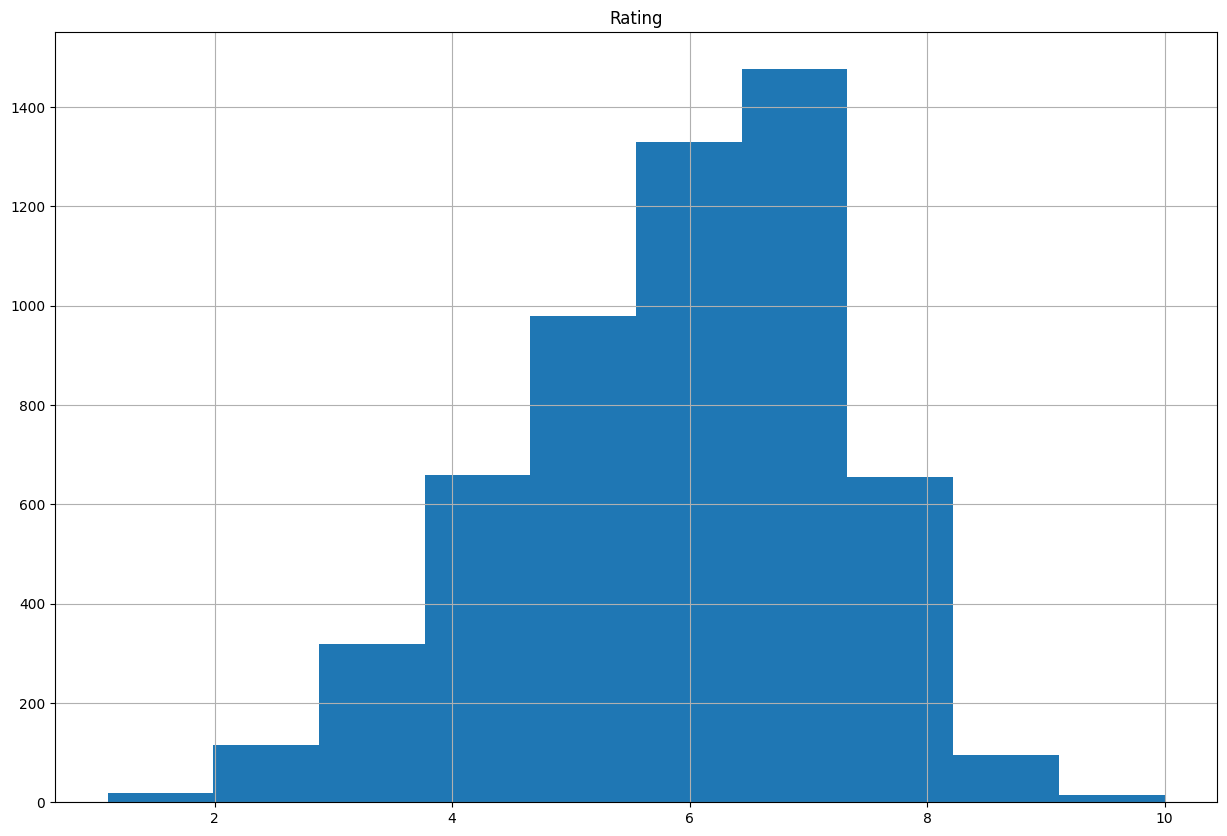

In [50]:
# Plot histogram
df.hist(figsize=(15, 10))

In [51]:
#Creating Features from the Genre
import pandas as pd

# Read the CSV file and store the data in a DataFrame
df = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")

# Create features from the genre code
def create_features(df):
    # Get the genre codes
    genre_codes = df['Genre'].str.get_dummies(sep=';')

    # Drop the original genre column
    df.drop('Genre', axis=1, inplace=True)

    # Join the genre codes with the original dataframe
    df = pd.concat([df, genre_codes], axis=1)

    # Return the updated dataframe
    return df

# Apply the function to the dataframe
df_with_features = create_features(df)

# Print the first 5 rows of the updated dataframe
print(df_with_features.head())

                                 Name    Year Duration  Rating Votes  \
0                                         NaN      NaN     NaN   NaN   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min     7.0     8   
2                         #Homecoming  (2021)   90 min     NaN   NaN   
3                             #Yaaram  (2019)  110 min     4.4    35   
4                   ...And Once Again  (2010)  105 min     NaN   NaN   

             Director       Actor 1             Actor 2          Actor 3  \
0       J.S. Randhawa      Manmauji              Birbal  Rajendra Bhatia   
1       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande    Arvind Jangid   
2  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur       Roy Angana   
3          Ovais Khan       Prateik          Ishita Raj  Siddhant Kapoor   
4        Amol Palekar  Rajat Kapoor  Rituparna Sengupta      Antara Mali   

   Action  ...  Romance, Thriller, Mystery  Sci-Fi  Sci-Fi, Thriller  Sport  \
0       0  ...                 

In [52]:
#Model Development 
import pandas as pd

# Load your dataset with explicit encoding specified
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Check data types of columns
print(data.dtypes)

# Examine unique values in the 'Name' and 'Genre' columns
print(data['Name'].unique())
print(data['Genre'].unique())



Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']
['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Documentary' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Thriller' 'Comedy, Drama' nan
 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family' 'Crime, Drama, Mystery'
 'Horror, Thriller' 'Biography' 'Comedy, Horror' 'Action'
 'Drama, Horror, Mystery' 'Comedy' 'Action, Thriller' 'Drama, History'
 'Drama, History, Sport' 'Horror, Mystery, Romance' 'Horror, Mystery'
 'Drama, Horror, Romance' 'Action, Drama, History' 'Action, Drama, War'
 'Comedy, Family' 'Adventure, Horror, Mystery' 'Action, Sci-Fi'
 'Crime, Mystery,

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
data = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

# Preprocess 'Duration' column to extract numeric values
data['Duration'] = data['Duration'].str.extract(r'(\d+)').astype(float)

# Drop rows with missing values
data.dropna(inplace=True)

# Define features and target variable
X = data[['Duration']]  # Example features
y = data['Rating']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

# Validate model on validation data
val_mse = mean_squared_error(y_val, model.predict(X_val))

# Evaluate model on test data
test_mse = mean_squared_error(y_test, model.predict(X_test))

# Print results
print("Mean Squared Error on Validation Data:", val_mse)
print("Mean Squared Error on Test Data:", test_mse)


Mean Squared Error on Validation Data: 1.981253013846092
Mean Squared Error on Test Data: 1.8541238413556653
